     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

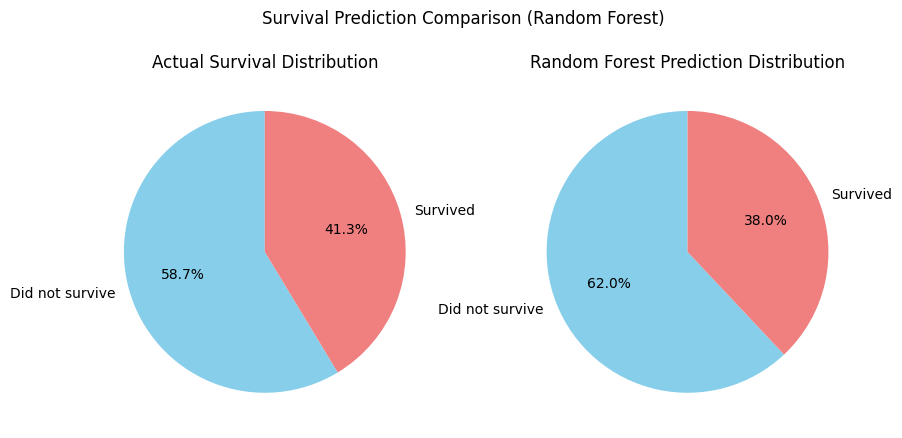

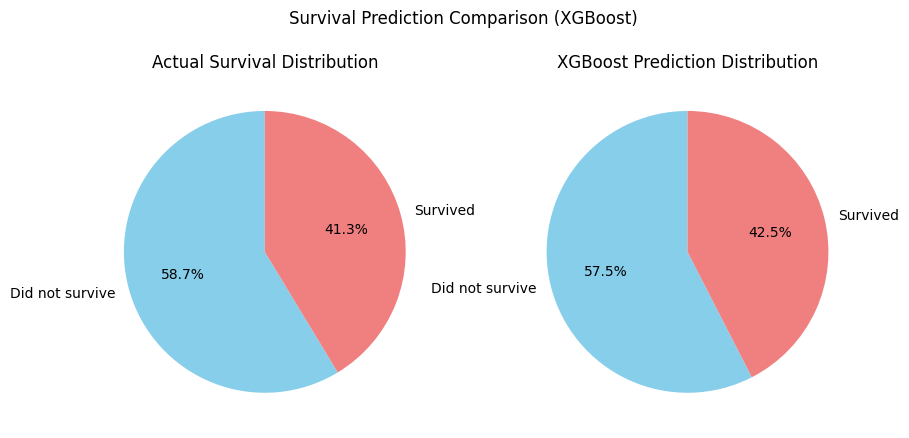

In [8]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

titanic_data = pd.read_csv("Titanic-Dataset.csv")

print(titanic_data)

# remove unnecessary columns and handle missing values
titanic_data = titanic_data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

# split the dataset into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# evaluate the RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf * 100:.2f}%')

# train an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

# make predictions on the test set using XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)

# evaluate the XGBoost Classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb * 100:.2f}%')

import matplotlib.pyplot as plt

# Visualize predictions using a pie chart for RandomForestClassifier
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(y_test.value_counts(), labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Actual Survival Distribution')

plt.subplot(1, 2, 2)
plt.pie(pd.Series(y_pred_rf).value_counts(), labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Random Forest Prediction Distribution')

plt.suptitle('Survival Prediction Comparison (Random Forest)')
plt.show()

# Visualize predictions using a pie chart for XGBoost Classifier
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(y_test.value_counts(), labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Actual Survival Distribution')

plt.subplot(1, 2, 2)
plt.pie(pd.Series(y_pred_xgb).value_counts(), labels=['Did not survive', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('XGBoost Prediction Distribution')

plt.suptitle('Survival Prediction Comparison (XGBoost)')
plt.show()
